In [2]:
#!pip install pyaudio
# !pip3 install librosa --user
#!pip3 install numpy
#!pip3 install ffmpeg
#!pip3 install keras
#!pip3 install tensorflow

In [1]:
import wave
#import pydub
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt
#import keras
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Wave Trial

In [10]:
s = wave.open("1;Petukhov V;25;M;.wav", "rb")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = s.getparams()
content = s.readframes(nframes)
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
    8: np.int64,
}
samples = np.fromstring(content, dtype = types[sampwidth])
for n in range(nchannels):
    channel = samples[n::nchannels]
duration = nframes / framerate 
w, h = 20000, 300
DPI = 72
peak = 256 ** sampwidth / 2
k = nframes/w/32

C:\Users\Aqice\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


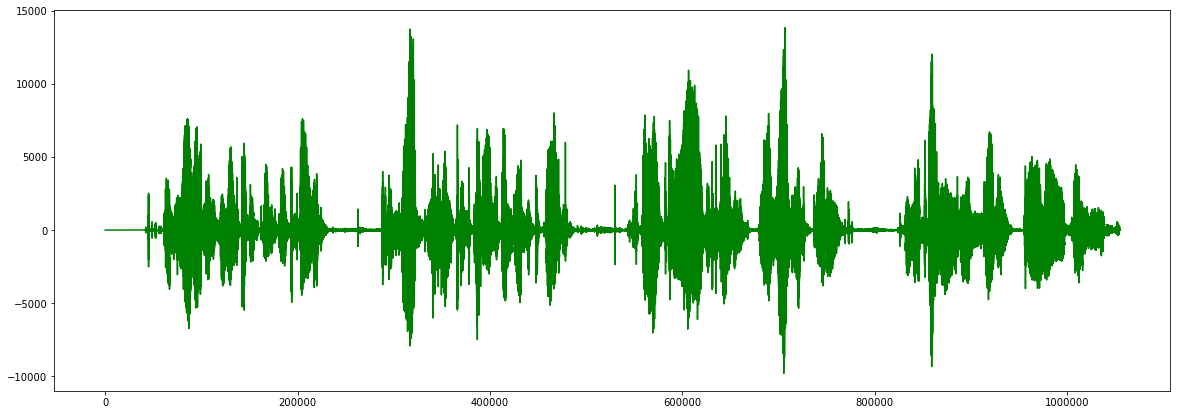

In [11]:
plt.figure(1, figsize=(20,7), dpi=DPI)
plt.plot(samples, "g")
plt.show()

In [12]:
amplitude = 300; 
freq_Hz = 500; 
data = []
n = 2000
for i in range(n):
    data.append(int(amplitude*100000000000* np.sin((2*np.pi*i*freq_Hz))/256)+123)
test = wave.open("test.wav","w")

test.setnframes(n)
test.setnchannels(1)
test.setsampwidth(4)
test.setframerate(1)

#for i in range(len(data)):
#    data[i] = bytes(data[i])
data = bytearray(data)
test.writeframes(data)

### Librosa trial

In [2]:
def splitting(name):
    return [os.path.splitext(name)[1]],  os.path.splitext(name)[0].split(';')[:-1]

In [3]:
#Каталог из которого будем брать файлы
directory = './Voices/'
#Получаем список файлов в переменную files
files = os.listdir(directory) 

In [4]:
#cut the middle values and make 10 audios from 1
lst = []
min_len = 110584
constant = min_len // 10
for i in range(len(files)):
    print(files[i])
    if files[i][0]=='1' or files[i][0]=='2':
        y, sr = librosa.load(directory+files[i])
        extension, name = splitting(files[i])
        interval = (len(y) - min_len) // 2
        for j in range(10):
            
            temp = []
            for k in range(constant):
                temp.append(y[interval+constant*j+k])
#                 lst.append(name+extension+[y[interval+constant*j+k]]+[sr])
#                 print(lst)
            lst.append(name + extension + temp + [sr])
        print('{} out of {}'.format(i, len(files)))

2;Brykalova I;23;F;.wav
0 out of 110
1;Christosova N;38;F;.wav
1 out of 110
2;Dymov N;22;M;.wav
2 out of 110
2;Nesterov V;21;M;.wav
3 out of 110
2;Frolova S;20;F;.wav
4 out of 110
2;Zharov A;22;M;.wav
5 out of 110
2;Danilina U;13;F;.wav
6 out of 110
1;Litvinov S;21;M;.wav
7 out of 110
2;Otradnov S;18;M;.wav
8 out of 110
1;Hertek A;21;F;.wav
9 out of 110
2;Shabalina V;37;F;.wav
10 out of 110
2;Israilov D;22;M;.wav
11 out of 110
1;Frolova S;20;F;.wav
12 out of 110
1;Petukhov V;25;M;.wav
13 out of 110
1;Welet A;24;F;.wav
14 out of 110
2;Glushkov G;20;M;.wav
15 out of 110
2;Kaliberda E.A;53;F;.wav
16 out of 110
1;Morozov S;21;M;.wav
17 out of 110
1;Sharipov K;21;M;.wav
18 out of 110
2;Hertek A;21;F;.wav
19 out of 110
2;Mamaeva M;21;F;.wav
20 out of 110
2;Harlamova S;42;F;.wav
21 out of 110
1;Kochkova E;19;F;.wav
22 out of 110
1;Mamaeva M;21;F;.wav
23 out of 110
1;Zharov A;22;M;.wav
24 out of 110
2;Koshelkov I;24;M;.wav
25 out of 110
2;Morozov S;21;M;.wav
26 out of 110
2;Welet A;24;F;.wav
2

In [5]:
lst[:10]

[['2',
  'Brykalova I',
  '23',
  'F',
  '.wav',
  0.0377441,
  0.04296277,
  0.04560247,
  0.048475612,
  0.04968251,
  0.05240611,
  0.053304393,
  0.052589502,
  0.05429956,
  0.053047277,
  0.053240508,
  0.051185463,
  0.047284655,
  0.04162814,
  0.031731386,
  0.024594061,
  0.015210868,
  0.0080235535,
  0.004547384,
  0.00038084073,
  -0.0019994932,
  -0.003527372,
  -0.0040381397,
  -0.007980404,
  -0.012490829,
  -0.017243769,
  -0.02477617,
  -0.03057196,
  -0.034706753,
  -0.03789522,
  -0.03644799,
  -0.035952885,
  -0.034372523,
  -0.03140036,
  -0.028628418,
  -0.02643185,
  -0.023910336,
  -0.021418352,
  -0.02058963,
  -0.019304335,
  -0.01919324,
  -0.017538298,
  -0.015687864,
  -0.012171377,
  -0.007909842,
  -0.0051405956,
  -0.0013749597,
  0.0033769144,
  0.006747825,
  0.009941019,
  0.011034578,
  0.010462854,
  0.009892877,
  0.00861272,
  0.0074029504,
  0.0074043036,
  0.007248773,
  0.0056008,
  0.0045356406,
  0.0051585543,
  0.0040442343,
  0.0023447725,

In [6]:
audios = ['Audio_{}'.format(i) for i in range(constant)]
col_names = ['Num', 'Name', 'Age', 'Gender', 'Ext'] + audios + ['Sr']

In [7]:
data = pd.DataFrame(lst, columns=col_names)
data.head()

,Num,Name,Age,Gender,Ext,Audio_0,Audio_1,Audio_2,Audio_3,Audio_4,...,Audio_11049,Audio_11050,Audio_11051,Audio_11052,Audio_11053,Audio_11054,Audio_11055,Audio_11056,Audio_11057,Sr
0,2,Brykalova I,23,F,.wav,0.037744,0.042963,0.045602,0.048476,0.049683,...,0.000911,0.000557,0.001369,0.001584,0.001286,0.000359,-0.000251,0.001169,-0.000582,22050
1,2,Brykalova I,23,F,.wav,0.001462,0.002927,0.001584,0.001837,0.003543,...,0.041023,0.039918,0.035112,0.024913,0.015266,0.004326,-0.006412,-0.009296,-0.008877,22050
2,2,Brykalova I,23,F,.wav,-0.014228,-0.018208,-0.013448,-0.011329,-0.014752,...,-0.001355,-0.001332,-0.001974,-0.003394,-0.003573,-0.004455,-0.005650,-0.006153,-0.008063,22050
3,2,Brykalova I,23,F,.wav,-0.008819,-0.009442,-0.009797,-0.010523,-0.010372,...,0.006796,-0.002877,0.019957,-0.009826,-0.018474,0.012452,0.015637,0.000487,-0.008682,22050
4,2,Brykalova I,23,F,.wav,0.003194,-0.001142,0.007503,-0.006924,0.012379,...,-0.000781,-0.001412,-0.000841,-0.001009,-0.001068,0.000122,-0.000027,-0.000311,-0.000219,22050


In [8]:
data.Name = data.Name.astype('category')
data.Name = data.Name.cat.rename_categories([i for i in range(data.Name.nunique())])

In [9]:
np.array(librosa.feature.mfcc(data[audios].iloc[1].values, data.Sr.iloc[1])).shape

(20, 22)

In [10]:
list_of_mfccs = []
for i in range(len(data)):
    mfcc = librosa.feature.mfcc(data[audios].iloc[i].values, data.Sr.iloc[i])
    mfcc = np.array(mfcc).ravel()

    list_of_mfccs.append(mfcc)
    if i % 100 == 0:
        print('{} out of {} (1)'.format(i, len(data)))
    
list_of_mfccs = np.array(list_of_mfccs)
mfcc_names = ['mfcc_{}'.format(i) for i in range(list_of_mfccs.shape[1])]
for i in range(list_of_mfccs.shape[1]):
    data['mfcc_{}'.format(i)] = list_of_mfccs[:, i]

0 out of 1100 (1)
100 out of 1100 (1)
200 out of 1100 (1)
300 out of 1100 (1)
400 out of 1100 (1)
500 out of 1100 (1)
600 out of 1100 (1)
700 out of 1100 (1)
800 out of 1100 (1)
900 out of 1100 (1)
1000 out of 1100 (1)


In [11]:
# sftf возвращает матрицу рядов, я ее превращая в вектор и потом просто его нумирую 

list_of_ffts = []

for i in range(data.shape[0]):
    elem = data[audios].iloc[i].values
    d = np.abs(librosa.stft(elem, n_fft=1024))
    d = d.ravel()
    
    list_of_ffts.append(d)

#    if i % 50 == 0:
#        print('{} out of {} (1)'.format(i, data.shape[0]))

list_of_ffts = np.array(list_of_ffts)

fft_names = ['fft_{}'.format(i) for i in range(list_of_ffts.shape[1])]
for i in range(list_of_ffts.shape[1]):
    data['fft_{}'.format(i)] = list_of_ffts[:, i]
#    if i % 1000 == 0:
#        print('{} out of {} (2)'.format(i, list_of_ffts.shape[1]))

In [12]:
list_of_rms = []
for i in range(data.shape[0]):
    elem = data[audios].iloc[i].values
    rms = librosa.feature.rmse(elem)
    list_of_rms.append(rms.ravel())
    
#    if i % 50 == 0:
#        print('{} out of {} (1)'.format(i, data.shape[0]))

list_of_rms = np.array(list_of_rms)

rms_names = ['rms_{}'.format(i) for i in range(list_of_rms.shape[1])]
for i in range(list_of_rms.shape[1]):
    data['rms_{}'.format(i)] = list_of_rms[:, i]

In [13]:
# Для удобства засовывания данных в функци spectral_contast заного делаем разложение на ряды фурье
contrasts = []
for i in range(len(data)):
    S = librosa.stft(data[audios].iloc[i].values, data.Sr.iloc[i])
    S = np.abs(S)
    
    contrast = librosa.feature.spectral_contrast(S=S, sr=data.Sr.iloc[i])
    contrasts.append(np.array(contrast).ravel())
#    if i % 50 == 0:
#        print('{} out of {} (1)'.format(i, data.shape[0]))

contrasts = np.array(contrasts)

contrast_names = ['contrast_{}'.format(i) for i in range(contrasts.shape[1])]
for i in range(contrasts.shape[1]):
    data['contrast_{}'.format(i)] = contrasts[:, i]

In [14]:
hop_length = 512
tempos = []

for i in range(len(data)):
    oenv = librosa.onset.onset_strength(y=data[audios].iloc[i].values, sr=data.Sr.iloc[i], hop_length=hop_length)
    tempo = librosa.feature.tempogram(onset_envelope=oenv, sr=data.Sr.iloc[i],
                                      hop_length=hop_length)
    tempos.append(np.array(tempo).ravel())
#    if i % 50 == 0:
#        print('{} out of {} (1)'.format(i, data.shape[0]))
    
tempos = np.array(tempos)
tempo_names = ['tempo_{}'.format(i) for i in range(tempos.shape[1])]

for i in range(tempos.shape[1]):
    data['tempo_{}'.format(i)] = tempos[:, i]

In [15]:
data.shape

(1100, 42567)

In [16]:
# data.Gender = (df.Gender.values > 0).astype(np.uint8)

In [17]:
data_hayam = data[data['Num'] != '2']

In [18]:
data_hayam.head()

,Num,Name,Age,Gender,Ext,Audio_0,Audio_1,Audio_2,Audio_3,Audio_4,...,tempo_8438,tempo_8439,tempo_8440,tempo_8441,tempo_8442,tempo_8443,tempo_8444,tempo_8445,tempo_8446,tempo_8447
10,1,7,38,F,.wav,-0.000544,-0.000141,-0.000553,-0.000761,-0.000370,...,7.746117e-16,9.772677e-16,7.750487e-16,1.147398e-15,1.110982e-15,1.120654e-15,8.965959e-16,1.105339e-15,9.308759e-16,6.616994e-16
11,1,7,38,F,.wav,-0.026887,-0.033357,-0.037839,-0.041680,-0.043030,...,6.934040e-16,5.417409e-16,5.092198e-16,7.115086e-16,4.035344e-16,6.590276e-16,6.347804e-16,6.042154e-16,6.273539e-16,5.445323e-16
12,1,7,38,F,.wav,0.008719,0.008682,0.008413,0.008770,0.008489,...,1.736614e-15,1.674124e-15,2.089116e-15,1.745327e-15,1.906132e-15,1.856198e-15,2.084407e-15,1.927021e-15,1.938169e-15,1.748652e-15
13,1,7,38,F,.wav,0.028938,0.020206,0.017730,0.013369,0.007726,...,9.092197e-16,1.637355e-15,1.077070e-15,1.568317e-15,1.396481e-15,1.163459e-15,1.558253e-15,2.004459e-15,9.297073e-16,1.335434e-15
14,1,7,38,F,.wav,0.059730,0.055162,0.050729,0.046572,0.041447,...,5.969946e-16,4.944526e-16,3.206211e-16,4.499352e-16,5.841942e-16,3.071361e-16,4.925441e-16,2.372485e-16,3.322084e-16,5.114113e-16


In [19]:
data_turtle = data[data['Num'] == '2']
data_turtle.head()

,Num,Name,Age,Gender,Ext,Audio_0,Audio_1,Audio_2,Audio_3,Audio_4,...,tempo_8438,tempo_8439,tempo_8440,tempo_8441,tempo_8442,tempo_8443,tempo_8444,tempo_8445,tempo_8446,tempo_8447
0,2,3,23,F,.wav,0.037744,0.042963,0.045602,0.048476,0.049683,...,1.561250e-15,1.291466e-15,1.332154e-15,1.314880e-15,1.661628e-15,1.489514e-15,1.827537e-15,1.435134e-15,1.435684e-15,9.566238e-16
1,2,3,23,F,.wav,0.001462,0.002927,0.001584,0.001837,0.003543,...,1.402835e-15,1.588255e-15,1.739124e-15,1.426136e-15,1.052141e-15,1.164138e-15,1.004135e-15,1.392955e-15,9.802482e-16,1.331793e-15
2,2,3,23,F,.wav,-0.014228,-0.018208,-0.013448,-0.011329,-0.014752,...,2.134176e-15,1.959953e-15,1.289490e-15,2.184553e-15,1.566022e-15,1.764726e-15,1.599210e-15,1.487644e-15,1.844869e-15,1.963951e-15
3,2,3,23,F,.wav,-0.008819,-0.009442,-0.009797,-0.010523,-0.010372,...,1.818391e-15,8.965885e-16,2.161455e-15,1.796088e-15,1.210311e-15,1.334605e-15,2.169840e-15,1.445776e-15,1.677294e-15,1.634762e-15
4,2,3,23,F,.wav,0.003194,-0.001142,0.007503,-0.006924,0.012379,...,2.021854e-15,2.711999e-15,2.185861e-15,2.140325e-15,1.917434e-15,2.325074e-15,2.139364e-15,1.585312e-15,2.134838e-15,2.506826e-15


In [20]:
target = data.Name
target_hayam = data_hayam.Name
target_turtle = data_turtle.Name

In [49]:
# фичи будем получать через список всех фич (для удобства сделал словарь)
features = {'Audio' : audios, 'Sr' : 'Sr', 'mfcc' : mfcc_names,
            'rms' : rms_names, 'contrast' : contrast_names, 'tempo' : tempo_names,
            'fft':fft_names}

In [22]:
data_turtle[features['Audio']].head()

,Audio_0,Audio_1,Audio_2,Audio_3,Audio_4,Audio_5,Audio_6,Audio_7,Audio_8,Audio_9,...,Audio_11048,Audio_11049,Audio_11050,Audio_11051,Audio_11052,Audio_11053,Audio_11054,Audio_11055,Audio_11056,Audio_11057
0,0.037744,0.042963,0.045602,0.048476,0.049683,0.052406,0.053304,0.052590,0.054300,0.053047,...,0.002999,0.000911,0.000557,0.001369,0.001584,0.001286,0.000359,-0.000251,0.001169,-0.000582
1,0.001462,0.002927,0.001584,0.001837,0.003543,0.001561,0.001354,0.001980,0.000730,0.000478,...,0.042864,0.041023,0.039918,0.035112,0.024913,0.015266,0.004326,-0.006412,-0.009296,-0.008877
2,-0.014228,-0.018208,-0.013448,-0.011329,-0.014752,-0.010101,-0.001393,0.000510,0.002691,0.010287,...,-0.001280,-0.001355,-0.001332,-0.001974,-0.003394,-0.003573,-0.004455,-0.005650,-0.006153,-0.008063
3,-0.008819,-0.009442,-0.009797,-0.010523,-0.010372,-0.011063,-0.012756,-0.013510,-0.014056,-0.012539,...,-0.001269,0.006796,-0.002877,0.019957,-0.009826,-0.018474,0.012452,0.015637,0.000487,-0.008682
4,0.003194,-0.001142,0.007503,-0.006924,0.012379,-0.000493,-0.016112,0.014665,-0.010951,-0.001711,...,-0.000085,-0.000781,-0.001412,-0.000841,-0.001009,-0.001068,0.000122,-0.000027,-0.000311,-0.000219


In [67]:
len(features['Audio']+features['contrast'])

11079

In [68]:
# Вот как теперь все просто :)
def making_train(data, columns): 
    temp = []
    for name in columns:
        temp+=features[name]
    return data[temp]

In [87]:
train_turtle = making_train(data_turtle, ['contrast','rms', 'mfcc'])

In [88]:
train_turtle.head()

,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,contrast_7,contrast_8,contrast_9,...,mfcc_430,mfcc_431,mfcc_432,mfcc_433,mfcc_434,mfcc_435,mfcc_436,mfcc_437,mfcc_438,mfcc_439
0,23.315451,15.977098,25.358312,32.291861,22.691619,25.967135,29.967384,22.035528,27.470469,30.499487,...,18.462853,13.200188,9.032169,6.613051,2.758857,-6.367099,-15.281421,-14.815994,0.129428,3.386520
1,24.953109,14.951391,22.924078,30.325508,21.747660,30.992122,27.094206,18.099544,25.203213,23.846326,...,2.509812,-8.393339,0.422087,2.464967,6.336675,6.053213,7.972082,8.121571,1.910519,-11.371966
2,25.382970,16.043508,26.327127,38.521173,22.873227,26.364299,28.063258,16.951304,30.707761,26.437969,...,0.076244,-5.290924,-1.640356,4.321760,3.113288,-0.914371,-6.540434,-11.152471,-9.786572,-10.341603
3,27.366305,21.238240,24.828477,29.995328,21.423196,27.721023,26.543950,19.068717,29.627252,30.542434,...,-3.611884,0.126323,1.271686,0.636504,1.814952,-3.180806,-6.025200,-1.387721,1.966758,8.306948
4,28.185332,21.024096,33.956337,33.260923,21.607054,30.812220,34.060751,20.612879,31.821746,22.803690,...,-1.146711,-0.796454,3.172590,0.327525,1.557101,-2.793813,-4.529521,2.716423,5.167876,4.823504


In [26]:
# Если вдруг захочешь сохранить (размер по идее будет довольно большой)
#data.to_csv('train_data.csv', index=False)

## Fitting part

In [186]:
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Dense, Dropout, Activation, Flatten
import tensorflow as tf

In [187]:
model = keras.models.Sequential()
input_shape = (1025,22,1)
model.add(Conv2D(512, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(500, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(55,activation=tf.nn.softmax)) 

In [159]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [296]:
X_train, X_test, y_train, y_test = train_test_split(flattened_ffts, target, test_size=0.1, shuffle=True)

In [297]:
X_train[5].shape

(22550,)

In [166]:
model.fit(x=X_train,y=y_train, epochs=10, batch_size=10) 

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 990 arrays: [array([[2.3632175e-01, 1.1798878e-01, 1.2653836e-02, ..., 9.9964269e-02,
        9.6054658e-02, 3.7929958e-01],
       [3.0732772e-01, 1.3116026e-01, 3.4217160e-02, ..., 6.0841173e-01,
        4.4395...

In [243]:
#X_train_hayam, X_test_hayam, y_train_hayam, y_test_hayam = train_test_split(
#    flattened_ffts_hayam, target_hayam, test_size=0.1, shuffle=True)

In [89]:
X_train_turtle, X_test_turtle, y_train_turtle, y_test_turtle = train_test_split(
    train_turtle.values, target_turtle, test_size=0.2, shuffle=True)

In [90]:
#clf = SVC(kernel='linear')
#clf.fit(X_train_hayam, y_train_hayam)
#pred_hayam = clf.predict(X_test_hayam)
#print(accuracy_score(pred_hayam, y_test_hayam))

In [91]:
clf = SVC(kernel='linear')
clf.fit(X_train_turtle, y_train_turtle)
pred_turtle = clf.predict(X_test_turtle)
print(accuracy_score(pred_turtle, y_test_turtle))

0.4090909090909091


In [92]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train_turtle, y_train_turtle)
pred_turtle = clf.predict(X_test_turtle)
print(accuracy_score(pred_turtle, y_test_turtle))

0.5272727272727272


In [93]:
features_list = sorted(list(zip(clf.feature_importances_, train_turtle.columns)), reverse=True)

In [94]:
features_list[:1000]

[(0.004824601765601086, 'contrast_1'),
 (0.0047413444770071644, 'mfcc_310'),
 (0.0038933119184209343, 'mfcc_318'),
 (0.003873160846050544, 'rms_5'),
 (0.0038653055211967102, 'mfcc_114'),
 (0.003848691502057456, 'mfcc_319'),
 (0.003784368988840133, 'mfcc_8'),
 (0.003728390261335614, 'mfcc_359'),
 (0.0035649086770223742, 'mfcc_113'),
 (0.003561378099321198, 'mfcc_356'),
 (0.003453512616759792, 'mfcc_6'),
 (0.0034520238713664233, 'rms_20'),
 (0.003441528800263621, 'mfcc_202'),
 (0.0034072306338946865, 'mfcc_7'),
 (0.0033924688200111957, 'mfcc_346'),
 (0.0033563029459499016, 'mfcc_344'),
 (0.003261223529573865, 'mfcc_15'),
 (0.0032001226557528155, 'rms_4'),
 (0.003155706160779317, 'mfcc_210'),
 (0.003127402371481158, 'mfcc_176'),
 (0.0030994998333477002, 'mfcc_348'),
 (0.0030834986791066043, 'mfcc_267'),
 (0.0030531597194664584, 'mfcc_309'),
 (0.00304916113840778, 'mfcc_337'),
 (0.0030424714617287487, 'mfcc_266'),
 (0.0030295038284980196, 'mfcc_315'),
 (0.002974716601273807, 'mfcc_347'),
 

In [100]:
features_list[0][0]

0.004824601765601086

In [108]:
best_train_turtle = pd.DataFrame()
i=0
while (features_list[i][0]>0.001):
    best_train_turtle[features_list[i][1]] = train_turtle[features_list[i][1]]
    i+=1

In [109]:
best_train_turtle.shape

(550, 481)

In [110]:
X_train_turtle, X_test_turtle, y_train_turtle, y_test_turtle = train_test_split(
    best_train_turtle.values, target_turtle, test_size=0.2, shuffle=True)

In [111]:
clf = SVC(kernel='linear')
clf.fit(X_train_turtle, y_train_turtle)
pred_turtle = clf.predict(X_test_turtle)
print(accuracy_score(pred_turtle, y_test_turtle))

0.41818181818181815


In [ ]:

#plt.figure(1, figsize=(20,7), dpi=DPI)
#plt.plot(y, "g")
#plt.show()
#if it is necessary to make more samples
#resampling_file = []
#l = len(y)//40
#for i in range(1,40):
#    resampling_file.append(y[(i-1)*l:i*l])
#print(len(resampling_file))

In [ ]:
'''plt.figure(1, figsize=(20,15), dpi=DPI)
D = []
for i in range(len(resampling_file)-1):
    d = np.abs(librosa.stft(resampling_file[i]))
    plt.subplot(6, 7, i+1)
    plt.plot(d, "r")
    D.append(d)
plt.show()'''

In [ ]:
for i in D:
    print(i.shape)

In [ ]:
D.shape

In [ ]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)